In [2]:
import os

# Change where the jupyter notebook is running to acces custom packages
os.chdir('../')
print(os.getcwd())  

d:\AA_Licenta\DeepFake-detection


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
from torchvision.models import resnet50, ResNet50_Weights
from helpers import evaluation, plotting, training
from helpers.CustomDataset import CustomDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [4]:
# PARAMS

BATCH_SIZE = 64
NUM_EPOCHS = 10
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
RANDOM_SEED = 2002

print(f"Device = {DEVICE}")

Device = cuda:0


In [5]:
# TRANSFORMS

train_transforms = transforms.Compose([
    torchvision.transforms.Resize((256, 256)),
    torchvision.transforms.RandomCrop((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

test_transforms = transforms.Compose([
    torchvision.transforms.Resize((70, 70)),
    torchvision.transforms.CenterCrop((64, 64)),
    torchvision.transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

In [6]:
# PATHS TO DATA
TRAIN_PATH_DATA = 'data/train/'
TRAIN_PATH_CSV = 'data/train_labels.csv'
TEST_PATH_DATA = 'data/test/'
TEST_PATH_CSV = 'data/test_labels.csv'
VALID_PATH_DATA = 'data/validation/'
VALID_PATH_CSV = 'data/validation_labels.csv'

In [7]:
# Datasets

train_dataset = CustomDataset(
    TRAIN_PATH_CSV, TRAIN_PATH_DATA, train_transforms)
test_dataset = CustomDataset(
    TEST_PATH_CSV, TEST_PATH_DATA, test_transforms)
validation_dataset = CustomDataset(
    VALID_PATH_CSV, VALID_PATH_DATA, test_transforms)

In [8]:
# Dataloaders

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=True)

validation_loader = DataLoader(dataset=validation_dataset,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([64, 3, 224, 224])
Image label dimensions: torch.Size([64])
Class labels of 10 examples: tensor([1, 0, 1, 0, 1, 0, 0, 0, 0, 1])


In [11]:
model = resnet50(weights=ResNet50_Weights.DEFAULT)
# transform multiclass model into binary classifier
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, 2)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\flavi/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 39.0MB/s]


In [12]:
#hyperparameters

loss = nn.BCELoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

model = model.to(DEVICE)
device = next(model.parameters()).device
print(f"Model is on {device}")

Model is on cuda:0


Epoch: 001/010 | Batch 0000/0310 | Loss: 0.7012
Epoch: 001/010 | Batch 0100/0310 | Loss: 0.1828
Epoch: 001/010 | Batch 0200/0310 | Loss: 0.2958
Epoch: 001/010 | Batch 0300/0310 | Loss: 0.3128
Epoch: 001/010 | Train: 88.70% | Validation: 48.08%
Time elapsed: 49.65 min
Epoch: 002/010 | Batch 0000/0310 | Loss: 0.1327
Epoch: 002/010 | Batch 0100/0310 | Loss: 0.2369
Epoch: 002/010 | Batch 0200/0310 | Loss: 0.2272
Epoch: 002/010 | Batch 0300/0310 | Loss: 0.3203
Epoch: 002/010 | Train: 93.42% | Validation: 50.33%
Time elapsed: 98.91 min
Epoch: 003/010 | Batch 0000/0310 | Loss: 0.1766
Epoch: 003/010 | Batch 0100/0310 | Loss: 0.2476
Epoch: 003/010 | Batch 0200/0310 | Loss: 0.0513
Epoch: 003/010 | Batch 0300/0310 | Loss: 0.2230
Epoch: 003/010 | Train: 94.34% | Validation: 48.83%
Time elapsed: 146.67 min
Epoch: 004/010 | Batch 0000/0310 | Loss: 0.1871
Epoch: 004/010 | Batch 0100/0310 | Loss: 0.0851
Epoch: 004/010 | Batch 0200/0310 | Loss: 0.0378
Epoch: 004/010 | Batch 0300/0310 | Loss: 0.1271
Epo

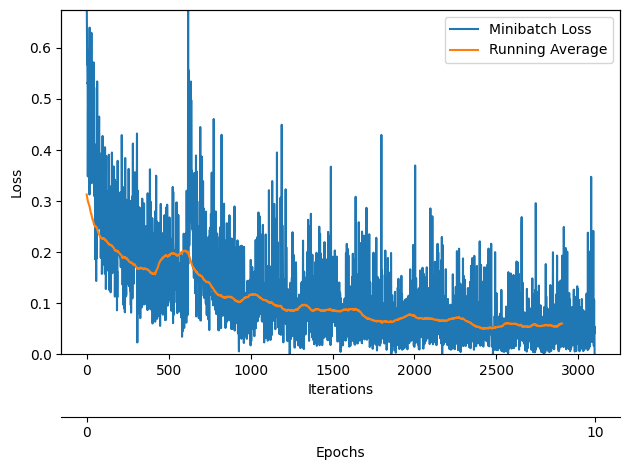

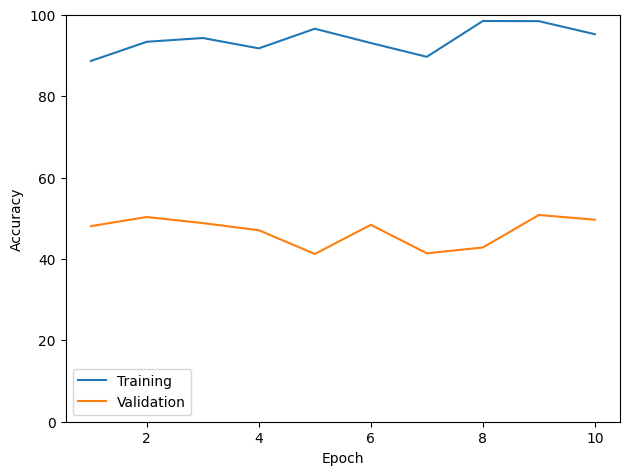

In [13]:
minibatch_loss_list, train_acc_list, valid_acc_list = training.train_model(
    model=model,

    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,

    valid_loader=validation_loader,
    test_loader=test_loader,

    optimizer=optimizer,

    device=DEVICE,

    logging_interval=100)


plotting.plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)

plt.show()


plotting.plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)

plt.ylim([0, 100])

plt.show()

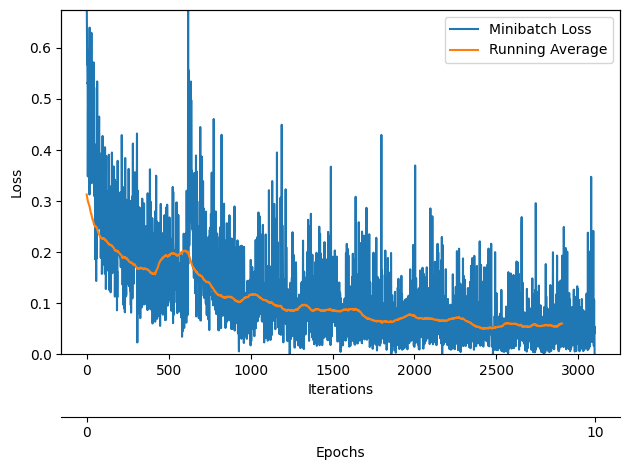

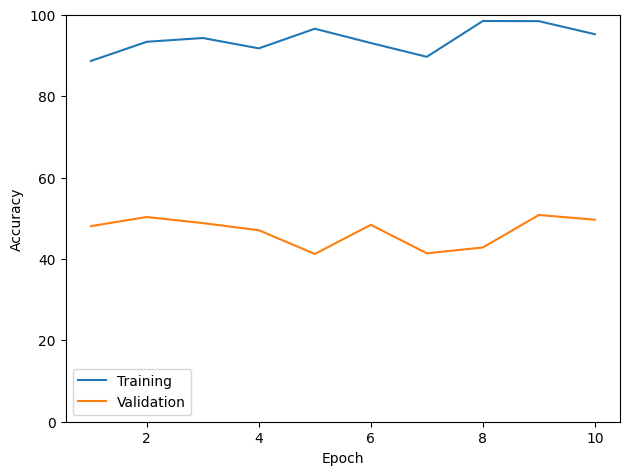

In [14]:
plotting.plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                            num_epochs=NUM_EPOCHS,
                            iter_per_epoch=len(train_loader),
                            results_dir=None,
                            averaging_iterations=200)
plt.savefig("./plots/resnet50_with_weigths-train-loss.png")
plt.show()


plotting.plot_accuracy(train_acc_list=train_acc_list,
                       valid_acc_list=valid_acc_list,
                       results_dir=None)

plt.ylim([0, 100])
plt.savefig("./plots/resnet50_with_weights-accuracy.png", dpi=300)
plt.show()

In [15]:
confusion_matrix = evaluation.compute_confusion_matrix(model, test_loader, device=DEVICE)

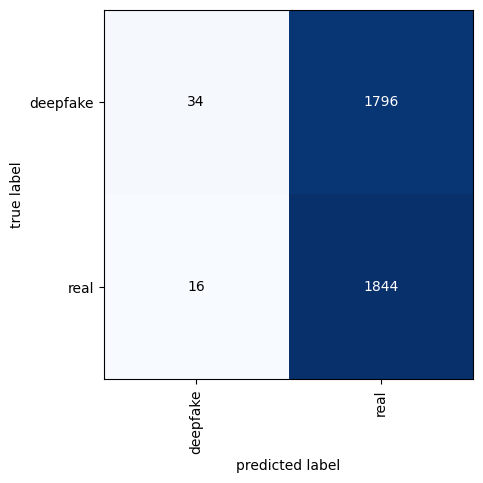

In [16]:
fig, _ = plotting.plot_confusion_matrix(confusion_matrix, class_names=['deepfake', 'real'])

plt.savefig("./plots/resnet50_pre_trained-confusion-matrix.png", dpi=300)

In [28]:
torch.save(model, 'baseline.pth')